In [1]:
# 사용할 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 전 기본 세팅
#한글 깨짐
plt.rc("font", family="Malgun Gothic")

In [2]:
# 파일 불러오기
sample_submission = pd.read_csv('data/sample_submission.csv', index_col='no')
test = pd.read_csv('data/test.csv', index_col='no')
train = pd.read_csv('data/train.csv', index_col='no')

## 예측할 값 : 개인 소득
- income : 50K 초과는 1, 50K 이하는 0 (소득)

### 컬럼 의미
- age - continuous.
- workclass(일 유형) : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt(일련의 관측 결과를 바탕으로 인구조사국이 부여하는 개인의 가중치): continuous.
- education(교육수준) : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num(교육수준 번호) : continuous.
- marital-status(결혼 상태) : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation(직업) : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship(가족관계) : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race(인종) : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex(성별) : Female, Male.
- capital-gain(자본 이익) : continuous.
- capital-loss(자본 손실) : continuous.
- hours-per-week(주당 근무 시간) : continuous.
- native-country(국적) : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
# train 데이터 확인
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   fnlwgt          19537 non-null  int64 
 3   education       19537 non-null  object
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  object
 6   occupation      19537 non-null  object
 7   relationship    19537 non-null  object
 8   race            19537 non-null  object
 9   sex             19537 non-null  object
 10  capital-gain    19537 non-null  int64 
 11  capital-loss    19537 non-null  int64 
 12  hours-per-week  19537 non-null  int64 
 13  native-country  19537 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB


- 범주형 데이터 8개와 수치형 데이터 7개로 이루어짐
- 결측치는 없음으로 확인

In [6]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
# 범주형 데이터 value값 확인
for col in train.columns:
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'{col}\n{categories}({len(categories)}개)')  
        print('--------------------')

workclass
[' Private' ' Self-emp-not-inc' ' Local-gov' ' ?' ' State-gov'
 ' Self-emp-inc' ' Federal-gov' ' Without-pay' ' Never-worked'](9개)
--------------------
education
[' 11th' ' Some-college' ' Bachelors' ' Assoc-voc' ' 9th' ' HS-grad'
 ' Masters' ' 5th-6th' ' Prof-school' ' 12th' ' 10th' ' Assoc-acdm'
 ' Doctorate' ' 7th-8th' ' 1st-4th' ' Preschool'](16개)
--------------------
marital-status
[' Divorced' ' Never-married' ' Married-civ-spouse' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse'](7개)
--------------------
occupation
[' Machine-op-inspct' ' Other-service' ' Handlers-cleaners'
 ' Tech-support' ' Transport-moving' ' Farming-fishing' ' Prof-specialty'
 ' Priv-house-serv' ' Adm-clerical' ' Protective-serv' ' Exec-managerial'
 ' ?' ' Craft-repair' ' Sales' ' Armed-Forces'](15개)
--------------------
relationship
[' Not-in-family' ' Husband' ' Unmarried' ' Other-relative' ' Own-child'
 ' Wife'](6개)
--------------------
race
[' White' ' Asian-Pac-Islander' 

## 결측치 제거
- null대신 ?이 들어가있음

In [8]:
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [9]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 

In [10]:
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

### value값 띄어쓰기 제거

In [11]:
# 띄어쓰기 제거함
for i in train.columns : 
    if train[f'{i}'].dtype == 'object' :
        train[f'{i}'] = train[f'{i}'].apply(lambda x: x.replace(' ', '')) # 제거하는 함수
    else :
        train[f'{i}'] = train[f'{i}']

In [12]:
for i in test.columns : 
    if test[f'{i}'].dtype == 'object' :
        test[f'{i}'] = test[f'{i}'].apply(lambda x: x.replace(' ', '')) # 제거하는 함수
    else :
        test[f'{i}'] = test[f'{i}']

In [13]:
train['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
title=['Private', 'Self-emp-not-inc', 'Local-gov', '?',
       'State-gov', 'Self-emp-inc','Federal-gov','Without-pay','Never-worked']
cover_title=['Private', 'Self-emp-not-inc', 'Local-gov', 'Private',
       'State-gov', 'Self-emp-inc','Federal-gov','Without-pay','Never-worked']
title_dict = dict(zip(title, cover_title))
title_dict
train['workclass'] = train['workclass'].map(title_dict)
train['workclass'].value_counts()

Private             22073
Self-emp-not-inc     2305
Local-gov            1868
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [15]:
test['workclass'].unique()

array(['?', 'Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
title=['?', 'Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked']
cover_title=['Private', 'Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked']
title_dict = dict(zip(title, cover_title))
title_dict
test['workclass'] =test['workclass'].map(title_dict)
test['workclass'].value_counts()

Private             14632
Self-emp-not-inc     1557
Local-gov            1268
State-gov             780
Self-emp-inc          708
Federal-gov           578
Without-pay             9
Never-worked            5
Name: workclass, dtype: int64

In [17]:
train['native-country'].unique()

array(['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       '?', 'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands'],
      dtype=object)

In [18]:
title=['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       '?', 'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']
cover_title=['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'United-States', 'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']
title_dict = dict(zip(title, cover_title))
title_dict
train['native-country'] = train['native-country'].map(title_dict)
train['native-country'].value_counts()

United-States                 26796
Mexico                          579
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                            60
Japan                            54
Columbia                         53
Poland                           53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Peru                             25
Greece                           25
Ireland                     

In [19]:
test['native-country'].unique()

array(['United-States', 'Puerto-Rico', 'Portugal', '?', 'El-Salvador',
       'Iran', 'India', 'Philippines', 'Vietnam', 'Cuba', 'Italy',
       'Hungary', 'Jamaica', 'Germany', 'Mexico', 'England', 'Columbia',
       'China', 'Nicaragua', 'Taiwan', 'Scotland', 'Ireland', 'Poland',
       'South', 'France', 'Guatemala', 'Japan', 'Canada', 'Ecuador',
       'Dominican-Republic', 'Yugoslavia', 'Haiti', 'Greece',
       'Outlying-US(Guam-USVI-etc)', 'Laos', 'Trinadad&Tobago',
       'Thailand', 'Peru', 'Honduras', 'Hong', 'Cambodia'], dtype=object)

In [20]:
title=['United-States', 'Puerto-Rico', 'Portugal', '?', 'El-Salvador',
       'Iran', 'India', 'Philippines', 'Vietnam', 'Cuba', 'Italy',
       'Hungary', 'Jamaica', 'Germany', 'Mexico', 'England', 'Columbia',
       'China', 'Nicaragua', 'Taiwan', 'Scotland', 'Ireland', 'Poland',
       'South', 'France', 'Guatemala', 'Japan', 'Canada', 'Ecuador',
       'Dominican-Republic', 'Yugoslavia', 'Haiti', 'Greece',
       'Outlying-US(Guam-USVI-etc)', 'Laos', 'Trinadad&Tobago',
       'Thailand', 'Peru', 'Honduras', 'Hong', 'Cambodia']
cover_title=['United-States', 'Puerto-Rico', 'Portugal', 'United-States', 'El-Salvador',
       'Iran', 'India', 'Philippines', 'Vietnam', 'Cuba', 'Italy',
       'Hungary', 'Jamaica', 'Germany', 'Mexico', 'England', 'Columbia',
       'China', 'Nicaragua', 'Taiwan', 'Scotland', 'Ireland', 'Poland',
       'South', 'France', 'Guatemala', 'Japan', 'Canada', 'Ecuador',
       'Dominican-Republic', 'Yugoslavia', 'Haiti', 'Greece',
       'Outlying-US(Guam-USVI-etc)', 'Laos', 'Trinadad&Tobago',
       'Thailand', 'Peru', 'Honduras', 'Hong', 'Cambodia']
title_dict = dict(zip(title, cover_title))
title_dict
test['native-country'] = test['native-country'].map(title_dict)
test['native-country'].value_counts()

United-States                 17893
Mexico                          372
Philippines                     117
Germany                          82
Canada                           71
Puerto-Rico                      67
India                            61
El-Salvador                      59
China                            54
England                          52
Italy                            45
Cuba                             44
Dominican-Republic               42
South                            41
Jamaica                          38
Japan                            38
Guatemala                        37
Vietnam                          36
Poland                           34
Columbia                         32
Taiwan                           26
Greece                           24
Ecuador                          24
Portugal                         24
Haiti                            24
Nicaragua                        21
Peru                             21
Iran                        

In [21]:
train['occupation'].unique()

array(['Machine-op-inspct', 'Other-service', 'Handlers-cleaners',
       'Tech-support', 'Transport-moving', 'Farming-fishing',
       'Prof-specialty', 'Priv-house-serv', 'Adm-clerical',
       'Protective-serv', 'Exec-managerial', '?', 'Craft-repair', 'Sales',
       'Armed-Forces'], dtype=object)

In [22]:
title=['Machine-op-inspct', 'Other-service', 'Handlers-cleaners',
       'Tech-support', 'Transport-moving', 'Farming-fishing',
       'Prof-specialty', 'Priv-house-serv', 'Adm-clerical',
       'Protective-serv', 'Exec-managerial', '?', 'Craft-repair', 'Sales',
       'Armed-Forces']
cover_title=['Machine-op-inspct', 'Other-service', 'Handlers-cleaners',
       'Tech-support', 'Transport-moving', 'Farming-fishing',
       'Prof-specialty', 'Priv-house-serv', 'Adm-clerical',
       'Protective-serv', 'Exec-managerial', 'Prof-specialty', 'Craft-repair', 'Sales',
       'Armed-Forces']
title_dict = dict(zip(title, cover_title))
title_dict
train['occupation'] = train['occupation'].map(title_dict)
train['occupation'].value_counts()

Prof-specialty       5392
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

In [23]:
test['occupation'].unique()

array(['?', 'Other-service', 'Tech-support', 'Exec-managerial',
       'Farming-fishing', 'Sales', 'Adm-clerical', 'Craft-repair',
       'Handlers-cleaners', 'Machine-op-inspct', 'Protective-serv',
       'Prof-specialty', 'Transport-moving', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [24]:
title=['?', 'Other-service', 'Tech-support', 'Exec-managerial',
       'Farming-fishing', 'Sales', 'Adm-clerical', 'Craft-repair',
       'Handlers-cleaners', 'Machine-op-inspct', 'Protective-serv',
       'Prof-specialty', 'Transport-moving', 'Priv-house-serv',
       'Armed-Forces']
cover_title=['Prof-specialty', 'Other-service', 'Tech-support', 'Exec-managerial',
       'Farming-fishing', 'Sales', 'Adm-clerical', 'Craft-repair',
       'Handlers-cleaners', 'Machine-op-inspct', 'Protective-serv',
       'Prof-specialty', 'Transport-moving', 'Priv-house-serv',
       'Armed-Forces']
title_dict = dict(zip(title, cover_title))
title_dict
test['occupation'] = test['occupation'].map(title_dict)
test['occupation'].value_counts()

Prof-specialty       3589
Craft-repair         2480
Exec-managerial      2477
Sales                2212
Adm-clerical         2171
Other-service        1948
Machine-op-inspct    1211
Transport-moving      962
Handlers-cleaners     823
Farming-fishing       602
Tech-support          581
Protective-serv       380
Priv-house-serv        96
Armed-Forces            5
Name: occupation, dtype: int64

In [25]:
"""
# ?의 비율이 적으므로 그냥 삭제해버리자

train.drop(index=train[(train['workclass'] == '?')].index, axis=0, inplace=True)
train.drop(index=train[(train['occupation'] == '?')].index, axis=0, inplace=True)
train.drop(index=train[(train['native-country'] == '?')].index, axis=0, inplace=True)

test.drop(index=test[(test['workclass'] == '?')].index, axis=0, inplace=True)
test.drop(index=test[(test['occupation'] == '?')].index, axis=0, inplace=True)
test.drop(index=test[(test['native-country'] == '?')].index, axis=0, inplace=True)
"""

"\n# ?의 비율이 적으므로 그냥 삭제해버리자\n\ntrain.drop(index=train[(train['workclass'] == '?')].index, axis=0, inplace=True)\ntrain.drop(index=train[(train['occupation'] == '?')].index, axis=0, inplace=True)\ntrain.drop(index=train[(train['native-country'] == '?')].index, axis=0, inplace=True)\n\ntest.drop(index=test[(test['workclass'] == '?')].index, axis=0, inplace=True)\ntest.drop(index=test[(test['occupation'] == '?')].index, axis=0, inplace=True)\ntest.drop(index=test[(test['native-country'] == '?')].index, axis=0, inplace=True)\n"

In [26]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


#### 자본 이익, 손실은 그냥 합쳐버리기

In [27]:
train['capital-gain-loss'] = train['capital-gain'] - train['capital-loss']

In [28]:
test['capital-gain-loss'] = test['capital-gain'] - test['capital-loss']

In [29]:
train = train.drop('capital-gain',axis=1)
train = train.drop('capital-loss',axis=1)
test = test.drop('capital-gain',axis=1)
test = test.drop('capital-loss',axis=1)

In [30]:
train.describe()

,age,fnlwgt,education-num,hours-per-week,income,capital-gain-loss
count,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000
mean,38.659171,1.897357e+05,10.083057,40.440096,0.240403,997.458215
std,13.743827,1.056348e+05,2.570371,12.332840,0.427335,7519.016560
min,17.000000,1.376900e+04,1.000000,1.000000,0.000000,-4356.000000
25%,28.000000,1.176060e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.779550e+05,10.000000,40.000000,0.000000,0.000000
75%,48.000000,2.377130e+05,12.000000,45.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99.000000,1.000000,99999.000000


In [31]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-gain-loss
no,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,40,United-States,0,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,55,United-States,0,-1721
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,50,Haiti,0,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,0,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,70,United-States,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,40,Puerto-Rico,0,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,40,United-States,0,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,40,United-States,0,0


## 데이터 탐색

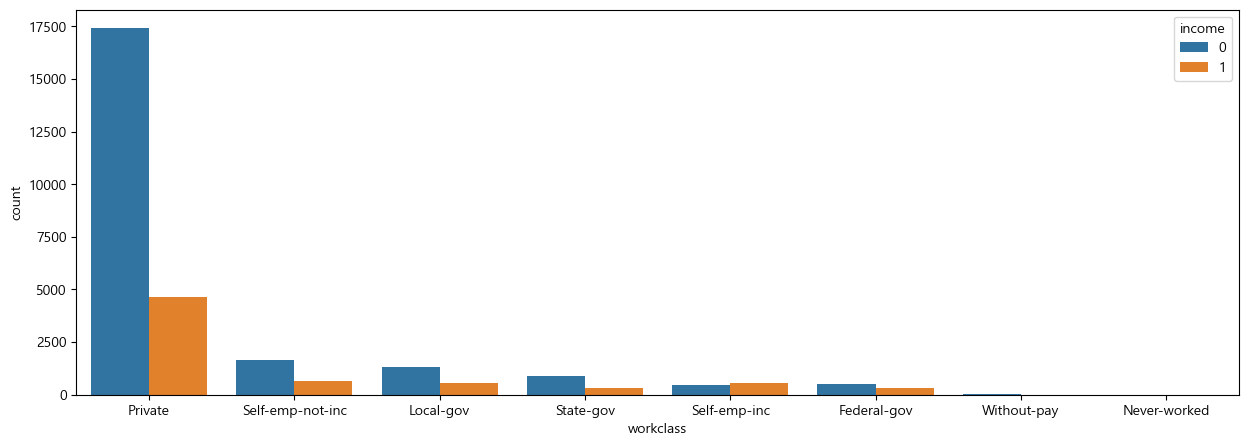

In [32]:
# workclass
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='workclass', hue='income')
plt.show()

In [33]:
print(train['education'].value_counts())
print(train['education-num'].value_counts())

HS-grad         9435
Some-college    6558
Bachelors       4848
Masters         1587
Assoc-voc       1230
11th            1057
Assoc-acdm       980
10th             816
7th-8th          574
Prof-school      500
9th              430
12th             415
Doctorate        347
5th-6th          334
1st-4th          148
Preschool         46
Name: education, dtype: int64
9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64


- education과 education-num은 같은 역할을 함
- preschool(미취학)=1 이고 Doctorate(박사학위)=16인것을 보아 education-num이 높을 수록 고학력
- education은 삭제하도록 함

In [34]:
train = train.drop('education',axis=1)
test = test.drop('education',axis=1)

In [35]:
train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-gain-loss
no,,,,,,,,,,,,,
1,25,Private,219199,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,40,United-States,0,0
2,39,Private,52978,10,Divorced,Other-service,Not-in-family,White,Female,55,United-States,0,-1721
3,35,Private,196899,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,50,Haiti,0,0
4,64,Private,135527,11,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,0,0
5,24,Private,60783,10,Married-civ-spouse,Transport-moving,Husband,White,Male,70,United-States,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,40,Puerto-Rico,0,0
29302,21,Private,372636,9,Never-married,Sales,Own-child,Black,Male,40,United-States,0,0
29303,18,Self-emp-not-inc,258474,6,Never-married,Farming-fishing,Own-child,White,Male,40,United-States,0,0


- age 범주형으로 바꾸기

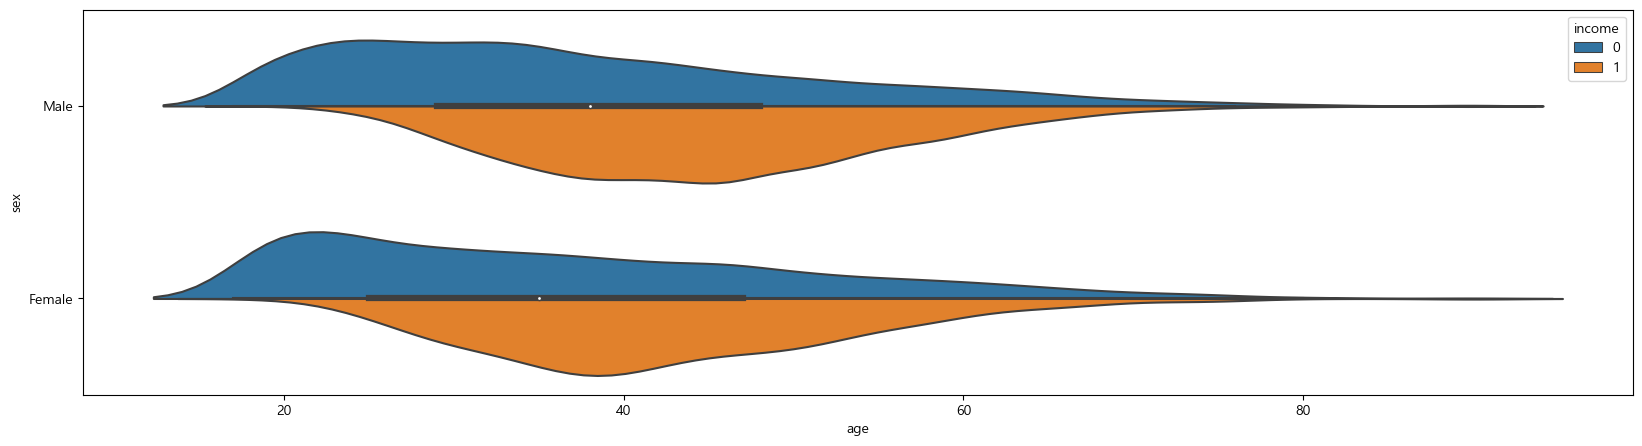

In [36]:
plt.figure(figsize=(20,5))
sns.violinplot(data=train, x ='age', y='sex', hue='income', split =True)
plt.show()

### 그룹화

- 결혼상태

In [37]:
train['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [38]:
marital_status = ['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse']

In [39]:
conver_marital_status = ['not-married', 'not-married', 'married', 'not-married', 'not-married', 'not-married','married']

In [40]:
marital_status_dict=dict(zip(marital_status, conver_marital_status))
marital_status_dict

{'Divorced': 'not-married',
 'Never-married': 'not-married',
 'Married-civ-spouse': 'married',
 'Separated': 'not-married',
 'Married-spouse-absent': 'not-married',
 'Widowed': 'not-married',
 'Married-AF-spouse': 'married'}

In [41]:
train['marital-status']=train['marital-status'].map(marital_status_dict)
test['marital-status']=test['marital-status'].map(marital_status_dict)

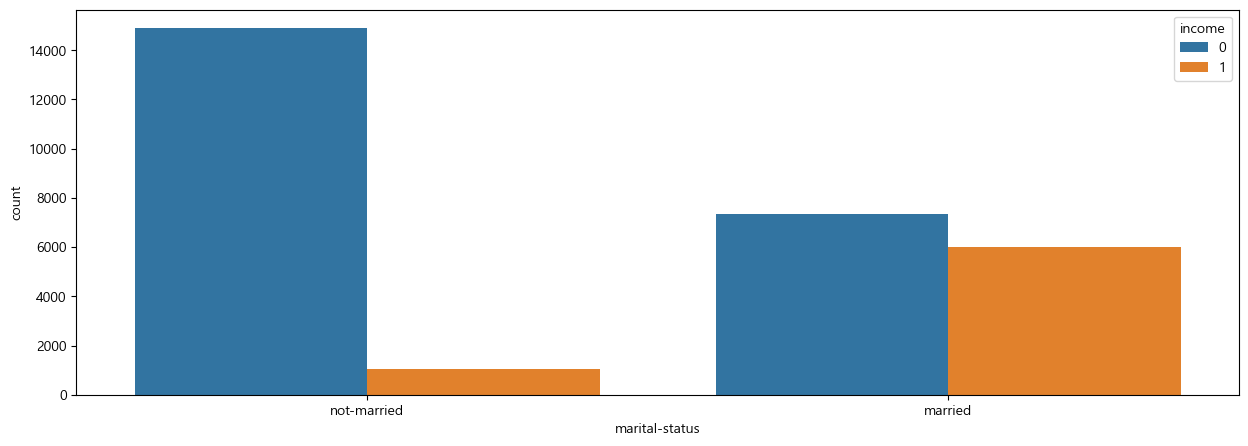

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='marital-status', hue='income')
plt.show()

- relationship

In [43]:
train['relationship'].unique()
title=['Not-in-family', 'Husband', 'Unmarried', 'Other-relative',
       'Own-child', 'Wife']
cover_title=['Not-in-family', 'Married', 'Unmarried', 'Other-relative',
       'Own-child', 'Married']
title_dict = dict(zip(title, cover_title))
title_dict
train['relationship'] = train['relationship'].map(title_dict)

In [44]:
test['relationship'].unique()

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

In [45]:
title=['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative']
cover_title=['Own-child', 'Married', 'Married', 'Not-in-family', 'Unmarried',
       'Other-relative']
title_dict = dict(zip(title, cover_title))
title_dict
test['relationship'] = test['relationship'].map(title_dict)

- 교육수준

In [46]:
bins = [0,4,8,12,16] # 범위지정
labels = ['e1', 'e2', 'e3', 'e4'] # 라벨지정
train['edu_group'] = pd.cut(train['education-num'], bins=bins, labels = labels)
test['edu_group'] = pd.cut(test['education-num'], bins=bins, labels=labels)

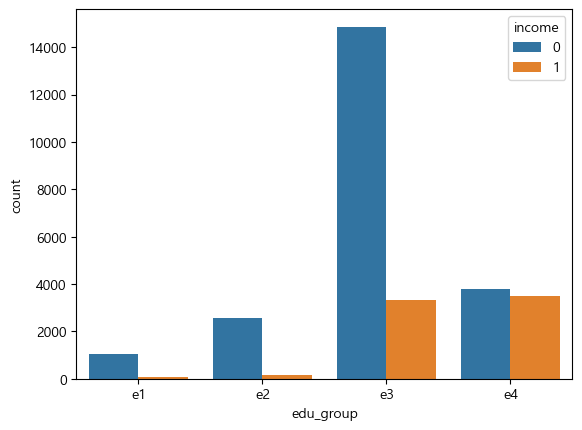

In [47]:
sns.countplot(data=train, x='edu_group', hue='income')
plt.show()

- age

In [48]:
#  사회 초년생 - age1 [17~30]
age1 = [i for i in range(17, 31)]
cover_age1 = ['young'] * (31-17)

#  중년층 - age2 [31~50]
age2 = [i for i in range(31, 51)]
cover_age2 = ['middle'] * (51-31)

# 노년층 - age3 [51 ~ 90]
age3 = [i for i in range(51, 91)]
cover_age3 = ['old'] * (91-51)

In [49]:
age_dict = dict(zip(age1 + age2 + age3, cover_age1 + cover_age2 + cover_age3))

In [50]:
train['age']=train['age'].map(age_dict)
test['age']=test['age'].map(age_dict)

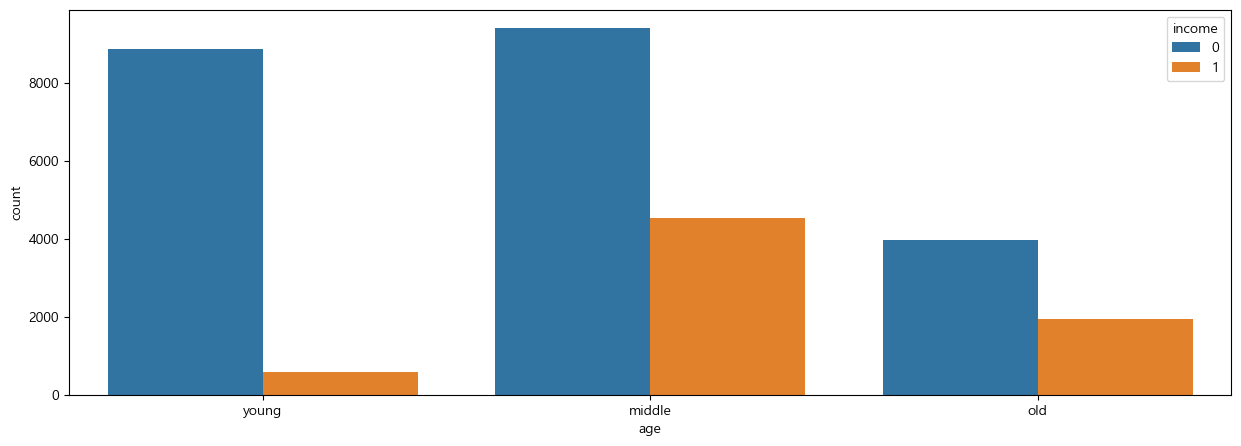

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='age', hue='income')
plt.show()

- workclass

In [52]:
title=['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
cover_title=['Private', 'Self-emp', 'gov', 'gov',
       'Self-emp', 'gov', 'beggar', 'beggar']
title_dict = dict(zip(title, cover_title))
train['workclass'] = train['workclass'].map(title_dict)
train['workclass']

no
1         Private
2         Private
3         Private
4         Private
5         Private
           ...   
29301     Private
29302     Private
29303    Self-emp
29304     Private
29305     Private
Name: workclass, Length: 29305, dtype: object

In [53]:
test['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [54]:
title=['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked']
cover_title=['Private', 'Self-emp', 'gov', 'Self-emp',
       'gov', 'gov', 'beggar', 'beggar']
title_dict = dict(zip(title, cover_title))
test['workclass'] = test['workclass'].map(title_dict)
test['workclass']

no
29306     Private
29307     Private
29308     Private
29309    Self-emp
29310     Private
           ...   
48838    Self-emp
48839     Private
48840     Private
48841     Private
48842     Private
Name: workclass, Length: 19537, dtype: object

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                29305 non-null  object  
 1   workclass          29305 non-null  object  
 2   fnlwgt             29305 non-null  int64   
 3   education-num      29305 non-null  int64   
 4   marital-status     29305 non-null  object  
 5   occupation         29305 non-null  object  
 6   relationship       29305 non-null  object  
 7   race               29305 non-null  object  
 8   sex                29305 non-null  object  
 9   hours-per-week     29305 non-null  int64   
 10  native-country     29305 non-null  object  
 11  income             29305 non-null  int64   
 12  capital-gain-loss  29305 non-null  int64   
 13  edu_group          29305 non-null  category
dtypes: category(1), int64(5), object(8)
memory usage: 3.2+ MB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                19537 non-null  object  
 1   workclass          19537 non-null  object  
 2   fnlwgt             19537 non-null  int64   
 3   education-num      19537 non-null  int64   
 4   marital-status     19537 non-null  object  
 5   occupation         19537 non-null  object  
 6   relationship       19537 non-null  object  
 7   race               19537 non-null  object  
 8   sex                19537 non-null  object  
 9   hours-per-week     19537 non-null  int64   
 10  native-country     19537 non-null  object  
 11  capital-gain-loss  19537 non-null  int64   
 12  edu_group          19537 non-null  category
dtypes: category(1), int64(4), object(8)
memory usage: 2.0+ MB


- 출신국가

In [57]:
train['native-country'].unique()

array(['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands'],
      dtype=object)

In [58]:
native_country = ['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Columbia', 'Hungary', 'Portugal', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']
conver_native_country = ['North America', 'North America', 'Asia', 'Europe', 'North America',
                         'North America', 'North America', 'North America', 'Asia', 'Europe',
                         'North America', 'Asia', 'Asia', 'North America', 'Europe',
                         'Asia', 'South America', 'North America', 'Asia', 'Europe',
                        'North America', 'Europe', 'Asia', 'Asia', 'North America',
                         'South America', 'Europe', 'Europe', 'South America', 'Asia',
                         'Europe', 'Asia', 'North America', 'Asia', 'Europe',
                         'Asia', 'South America', 'Europe', 'North America', 'Europe', 'Europe']

In [59]:
native_country_dict = dict(zip(native_country, conver_native_country))
native_country_dict

{'United-States': 'North America',
 'Haiti': 'North America',
 'Mexico': 'Asia',
 'Puerto-Rico': 'Europe',
 'Philippines': 'North America',
 'Germany': 'North America',
 'Peru': 'North America',
 'Ecuador': 'North America',
 'Iran': 'Asia',
 'Thailand': 'Europe',
 'Dominican-Republic': 'North America',
 'Poland': 'Asia',
 'Scotland': 'Asia',
 'Italy': 'North America',
 'Jamaica': 'Europe',
 'China': 'Asia',
 'Columbia': 'South America',
 'Hungary': 'North America',
 'Portugal': 'Asia',
 'Vietnam': 'Europe',
 'Taiwan': 'North America',
 'Canada': 'Europe',
 'Hong': 'Asia',
 'Guatemala': 'Asia',
 'El-Salvador': 'North America',
 'England': 'South America',
 'Outlying-US(Guam-USVI-etc)': 'Europe',
 'India': 'Europe',
 'France': 'South America',
 'Cuba': 'Asia',
 'Greece': 'Europe',
 'Trinadad&Tobago': 'Asia',
 'South': 'North America',
 'Japan': 'Asia',
 'Yugoslavia': 'Europe',
 'Nicaragua': 'Asia',
 'Ireland': 'South America',
 'Cambodia': 'Europe',
 'Laos': 'North America',
 'Honduras':

In [60]:
train['native-country']=train['native-country'].map(native_country_dict)

In [61]:
test['native-country']=test['native-country'].map(native_country_dict)

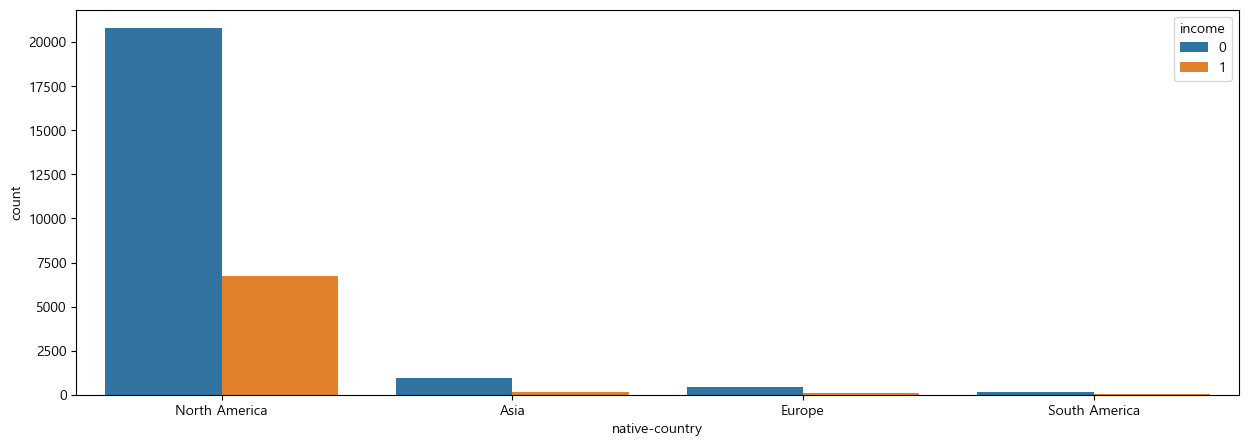

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='native-country', hue='income')
plt.show()

In [63]:
train['education-num'] = train['edu_group']

In [64]:
train = train.drop('edu_group',axis=1)

In [65]:
train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-gain-loss
no,,,,,,,,,,,,,
1,young,Private,219199,e2,not-married,Machine-op-inspct,Not-in-family,White,Male,40,North America,0,0
2,middle,Private,52978,e3,not-married,Other-service,Not-in-family,White,Female,55,North America,0,-1721
3,middle,Private,196899,e4,not-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,50,North America,0,0
4,old,Private,135527,e3,not-married,Tech-support,Not-in-family,White,Female,40,North America,0,0
5,young,Private,60783,e3,married,Transport-moving,Married,White,Male,70,North America,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,young,Private,100605,e3,not-married,Sales,Own-child,Other,Male,40,Europe,0,0
29302,young,Private,372636,e3,not-married,Sales,Own-child,Black,Male,40,North America,0,0
29303,young,Self-emp,258474,e2,not-married,Farming-fishing,Own-child,White,Male,40,North America,0,0


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                29305 non-null  object  
 1   workclass          29305 non-null  object  
 2   fnlwgt             29305 non-null  int64   
 3   education-num      29305 non-null  category
 4   marital-status     29305 non-null  object  
 5   occupation         29305 non-null  object  
 6   relationship       29305 non-null  object  
 7   race               29305 non-null  object  
 8   sex                29305 non-null  object  
 9   hours-per-week     29305 non-null  int64   
 10  native-country     29305 non-null  object  
 11  income             29305 non-null  int64   
 12  capital-gain-loss  29305 non-null  int64   
dtypes: category(1), int64(4), object(8)
memory usage: 2.9+ MB


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                19537 non-null  object  
 1   workclass          19537 non-null  object  
 2   fnlwgt             19537 non-null  int64   
 3   education-num      19537 non-null  int64   
 4   marital-status     19537 non-null  object  
 5   occupation         19537 non-null  object  
 6   relationship       19537 non-null  object  
 7   race               19537 non-null  object  
 8   sex                19537 non-null  object  
 9   hours-per-week     19537 non-null  int64   
 10  native-country     19537 non-null  object  
 11  capital-gain-loss  19537 non-null  int64   
 12  edu_group          19537 non-null  category
dtypes: category(1), int64(4), object(8)
memory usage: 2.0+ MB


In [68]:
print(sorted(train['hours-per-week'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99]


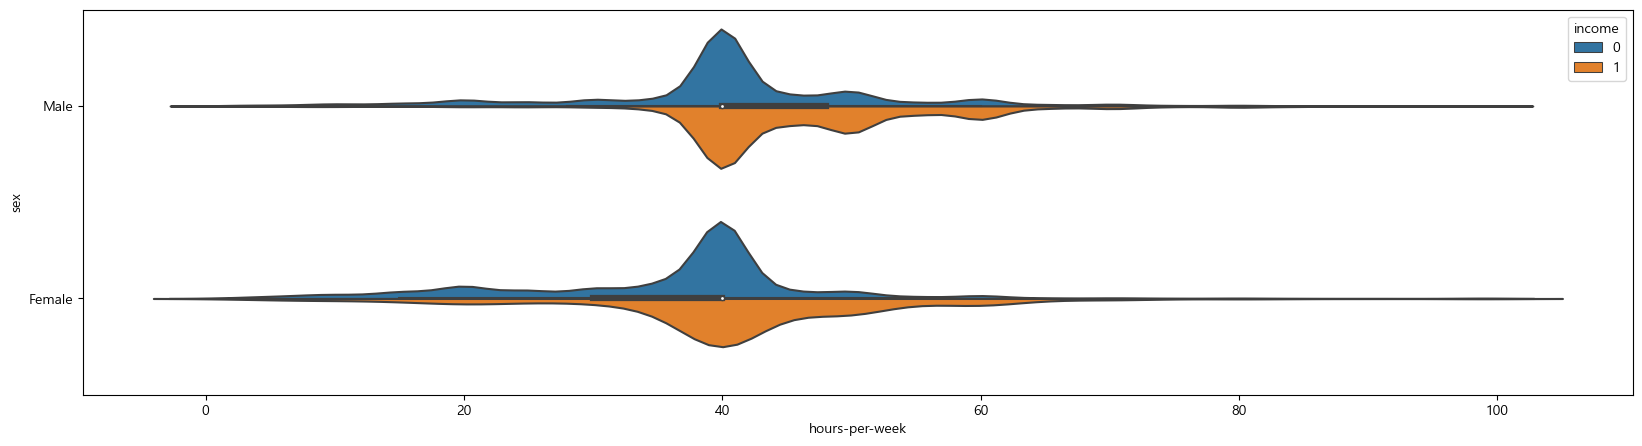

In [69]:
plt.figure(figsize=(20,5))
sns.violinplot(data=train, x ='hours-per-week', y='sex', hue='income', split =True)
plt.show()

In [70]:
bins = [i for i in range(0, 101,5)]
labels = ['h' + str(i) for i in range(0, 100,5)] # 라벨지정
train['hours-per-week'] = pd.cut(train['hours-per-week'], bins=bins, labels = labels)
test['hours-per-week'] = pd.cut(test['hours-per-week'], bins=bins, labels=labels)

In [71]:
train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-gain-loss
no,,,,,,,,,,,,,
1,young,Private,219199,e2,not-married,Machine-op-inspct,Not-in-family,White,Male,h35,North America,0,0
2,middle,Private,52978,e3,not-married,Other-service,Not-in-family,White,Female,h50,North America,0,-1721
3,middle,Private,196899,e4,not-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,h45,North America,0,0
4,old,Private,135527,e3,not-married,Tech-support,Not-in-family,White,Female,h35,North America,0,0
5,young,Private,60783,e3,married,Transport-moving,Married,White,Male,h65,North America,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,young,Private,100605,e3,not-married,Sales,Own-child,Other,Male,h35,Europe,0,0
29302,young,Private,372636,e3,not-married,Sales,Own-child,Black,Male,h35,North America,0,0
29303,young,Self-emp,258474,e2,not-married,Farming-fishing,Own-child,White,Male,h35,North America,0,0


#### 가중치 지우고 해보기

In [72]:
train = train.drop('fnlwgt',axis=1)

In [73]:
test= test.drop('fnlwgt',axis=1)

- 컬럼순서 바꾸기

In [74]:
train.columns=['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
        'income','capital-gain-loss']

In [75]:
train = train[['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
        'capital-gain-loss','income']]

In [76]:
train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-gain-loss,income
no,,,,,,,,,,,,
1,young,Private,e2,not-married,Machine-op-inspct,Not-in-family,White,Male,h35,North America,0,0
2,middle,Private,e3,not-married,Other-service,Not-in-family,White,Female,h50,North America,-1721,0
3,middle,Private,e4,not-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,h45,North America,0,0
4,old,Private,e3,not-married,Tech-support,Not-in-family,White,Female,h35,North America,0,0
5,young,Private,e3,married,Transport-moving,Married,White,Male,h65,North America,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29301,young,Private,e3,not-married,Sales,Own-child,Other,Male,h35,Europe,0,0
29302,young,Private,e3,not-married,Sales,Own-child,Black,Male,h35,North America,0,0
29303,young,Self-emp,e2,not-married,Farming-fishing,Own-child,White,Male,h35,North America,0,0


In [77]:
print(sorted(train['capital-gain-loss'].unique()))

[-4356, -3770, -3683, -3175, -3004, -2824, -2603, -2559, -2547, -2472, -2467, -2465, -2457, -2444, -2415, -2392, -2377, -2352, -2339, -2267, -2258, -2246, -2238, -2231, -2206, -2205, -2201, -2179, -2174, -2163, -2149, -2129, -2057, -2051, -2042, -2002, -2001, -1980, -1977, -1974, -1944, -1902, -1887, -1876, -1870, -1848, -1844, -1825, -1816, -1762, -1755, -1741, -1740, -1735, -1726, -1721, -1719, -1672, -1669, -1668, -1651, -1648, -1628, -1617, -1602, -1594, -1590, -1579, -1573, -1564, -1539, -1510, -1504, -1485, -1429, -1411, -1408, -1380, -1340, -1258, -1138, -1092, -974, -880, -810, -653, -625, -419, -323, -213, 0, 114, 401, 594, 914, 991, 1055, 1086, 1111, 1151, 1173, 1264, 1409, 1424, 1455, 1471, 1506, 1797, 1831, 1848, 2009, 2036, 2050, 2105, 2174, 2176, 2202, 2228, 2290, 2329, 2346, 2354, 2407, 2414, 2463, 2538, 2580, 2597, 2635, 2653, 2829, 2885, 2907, 2936, 2961, 2964, 2977, 2993, 3103, 3137, 3273, 3325, 3411, 3418, 3432, 3456, 3464, 3471, 3674, 3781, 3818, 3887, 3908, 3942, 4

In [78]:
bins = [-4357,-1,1,100000] # 범위지정
labels = ['-1', '0', '1'] # 라벨지정
train['capital-gain-loss'] = pd.cut(train['capital-gain-loss'], bins=bins, labels = labels)
test['capital-gain-loss'] = pd.cut(test['capital-gain-loss'], bins=bins, labels=labels)

In [79]:
print(train['capital-gain-loss'].unique())

['0', '-1', '1']
Categories (3, object): ['-1' < '0' < '1']


In [80]:
# 문제/답 분리
X_train = train.loc[:,:'capital-gain-loss']
y_train = train['income']

In [81]:
X_train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-gain-loss
no,,,,,,,,,,,
1,young,Private,e2,not-married,Machine-op-inspct,Not-in-family,White,Male,h35,North America,0
2,middle,Private,e3,not-married,Other-service,Not-in-family,White,Female,h50,North America,-1
3,middle,Private,e4,not-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,h45,North America,0
4,old,Private,e3,not-married,Tech-support,Not-in-family,White,Female,h35,North America,0
5,young,Private,e3,married,Transport-moving,Married,White,Male,h65,North America,0
...,...,...,...,...,...,...,...,...,...,...,...
29301,young,Private,e3,not-married,Sales,Own-child,Other,Male,h35,Europe,0
29302,young,Private,e3,not-married,Sales,Own-child,Black,Male,h35,North America,0
29303,young,Self-emp,e2,not-married,Farming-fishing,Own-child,White,Male,h35,North America,0


In [82]:
y_train

no
1        0
2        0
3        0
4        0
5        1
        ..
29301    0
29302    0
29303    0
29304    0
29305    0
Name: income, Length: 29305, dtype: int64

In [83]:
test['education-num'] = test['edu_group']
test= test.drop('edu_group',axis=1)

In [84]:
X_one_hot = pd.get_dummies(X_train) # 0과 1로만 이루어진 열을 생성
X_one_hot

,age_middle,age_old,age_young,workclass_Private,workclass_Self-emp,workclass_beggar,workclass_gov,education-num_e1,education-num_e2,education-num_e3,...,hours-per-week_h85,hours-per-week_h90,hours-per-week_h95,native-country_Asia,native-country_Europe,native-country_North America,native-country_South America,capital-gain-loss_-1,capital-gain-loss_0,capital-gain-loss_1
no,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
29302,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
29303,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [86]:
knn_model = KNeighborsClassifier(n_neighbors=5)
tree_model = DecisionTreeClassifier(max_depth=5)

In [87]:
result = cross_val_score(tree_model,X_one_hot,y_train,cv = 5)
result

array([0.8271626 , 0.84371268, 0.82665074, 0.83023375, 0.82784508])

In [88]:
result.mean()

0.8311209691178979

In [89]:
result2 = cross_val_score(knn_model,X_one_hot,y_train,cv = 5)
result2

array([0.81470739, 0.8271626 , 0.80771199, 0.81538987, 0.81948473])

In [90]:
knn_model.fit(X_one_hot,y_train)
tree_model.fit(X_one_hot,y_train)

DecisionTreeClassifier(max_depth=5)

In [91]:
X_test = pd.get_dummies(test) # 0과 1로만 이루어진 열을 생성
X_test

,age_middle,age_old,age_young,workclass_Private,workclass_Self-emp,workclass_beggar,workclass_gov,education-num_e1,education-num_e2,education-num_e3,...,hours-per-week_h85,hours-per-week_h90,hours-per-week_h95,native-country_Asia,native-country_Europe,native-country_North America,native-country_South America,capital-gain-loss_-1,capital-gain-loss_0,capital-gain-loss_1
no,,,,,,,,,,,,,,,,,,,,,
29306,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
29307,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
29308,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
29309,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
29310,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48839,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48840,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [92]:
pre = tree_model.predict(X_test)
pre2 = knn_model.predict(X_test)

In [93]:
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('tree_model.csv', index = False)

In [94]:
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre2
result.to_csv('knn_model.csv', index = False)

- min-max scaler적용하기

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
X_train= X_one_hot

In [97]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [98]:
mm_transform_X_train = mm_scaler.transform(X_train)
mm_transform_X_train = pd.DataFrame(mm_transform_X_train, columns=X_train.columns)
mm_transform_X_test = mm_scaler.transform(X_test)
mm_transform_X_test = pd.DataFrame(mm_transform_X_test, columns=X_test.columns)

In [99]:
result = cross_val_score(knn_model,
                          mm_transform_X_train,
                          y_train,
                          cv = 5)

In [100]:
result.mean()

0.8183245180003412

In [101]:
knn_model.fit(mm_transform_X_train,y_train)
pre = knn_model.predict(mm_transform_X_test)

In [102]:
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('knn_model_mm.csv', index = False)

- 앙상블

In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [104]:
# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=1000,  # 결정트리의 개수
                                 max_depth=5,         # 트리의 최대 깊이
                                 min_samples_leaf=15, # 리프노드가 되기 위한 최소한의 샘플 데이터 수
                                 max_leaf_nodes=50)   # 리프노드의 최대 개수

In [105]:
#교차검증 확인
result = cross_val_score(rf_model,
                          X_train,
                          y_train,
                          cv = 5)

In [106]:
result.mean()

0.829790138201672

In [107]:
# 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=15,
                       n_estimators=1000)

In [108]:
# 예측
pre = rf_model.predict(X_test)

In [109]:
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('rf_model.csv', index = False)

- 보팅

In [110]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors=5)
tree_model = DecisionTreeClassifier(max_depth=5)
forest_model = RandomForestClassifier(n_estimators=1000,
                                 max_depth=5,         
                                 min_samples_leaf=15,
                                 max_leaf_nodes=50)

In [111]:
knn_model.fit(mm_transform_X_train,y_train)
tree_model.fit(X_train,y_train)
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=15,
                       n_estimators=1000)

In [112]:
voting_model = VotingClassifier(
                    estimators=[
                        ('knn',knn_model),
                        ('tree',tree_model),
                        ('forest',forest_model)
                    ],
                    voting='soft'
                )

In [113]:
# 교차검증 확인
result = cross_val_score(voting_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

0.8307114826821362

In [114]:
# 학습
voting_model.fit(X_train,y_train)
# 예측
pre = voting_model.predict(X_test)

In [115]:
# 정답제출
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('voting_model.csv', index = False)

- 부스팅

In [116]:
# AdaBoost모델생성
Ada_model = AdaBoostClassifier(n_estimators=100)

In [117]:
# 교차검증
result = cross_val_score(Ada_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

0.8399590513564238

In [118]:
# 학습
Ada_model.fit(X_train,y_train)
# 예측
pre = Ada_model.predict(X_test)

In [119]:
# 정답제출
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('ada_model.csv', index = False)

- 그리드 서치

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
"""param_grid = {
    'max_depth' : [5, 10, 15, 20],
    'n_estimators' : [1000,1500,2000,2500],
    'min_samples_leaf' : [10,30,50],
    'max_leaf_nodes' : [20,50,80]
}"""

"param_grid = {\n    'max_depth' : [5, 10, 15, 20],\n    'n_estimators' : [1000,1500,2000,2500],\n    'min_samples_leaf' : [10,30,50],\n    'max_leaf_nodes' : [20,50,80]\n}"

In [122]:
"""grid = GridSearchCV(rf_model,
                    param_grid,
                    cv = 3)"""

'grid = GridSearchCV(rf_model,\n                    param_grid,\n                    cv = 3)'

In [123]:
"""grid.fit(X_train,y_train)"""

'grid.fit(X_train,y_train)'

In [124]:
"""# best_score_ 메서드
print(grid.best_score_)
# best_params_ 메서드
print(grid.best_params_)"""

'# best_score_ 메서드\nprint(grid.best_score_)\n# best_params_ 메서드\nprint(grid.best_params_)'

In [125]:
# 모델 생성
final_rf_model = RandomForestClassifier(max_depth=20,
                                        max_leaf_nodes=80,
                                        min_samples_leaf=10,
                                        n_estimators=1500)

In [126]:
result = cross_val_score(final_rf_model,
                          X_train,
                          y_train,
                          cv = 5)

In [127]:
result.mean()

0.8374338850025593

In [128]:
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=80, min_samples_leaf=10,
                       n_estimators=1500)

In [129]:
pre = final_rf_model.predict(X_test)

In [130]:
# 정답제출
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('final_rf_model.csv', index = False)